# 7. Statistical Analysis
Problem Statement: Perform a statistical analysis on a given dataset to identify significant
trends and correlations. Provide a summary of your findings.
Requirements:
Use statistical methods (e.g., correlation analysis, hypothesis testing).
Present the results using visualizations.
Evaluation Criteria: Correctness of analysis, clarity of summary, and visual presentation.

# Step1: Import Libraries and Dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [10]:
# Load the dataset
df = pd.read_excel("R:/downloader/sample_superstore.xls", parse_dates=['Order Date', 'Ship Date'])

# Display the dataframe
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Step2: Summary statistics

In [9]:
# Summary Statistics
print(df[['Sales', 'Profit', 'Quantity', 'Discount']].describe())

              Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574     0.156203
std      623.245101   234.260108     2.225110     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.728750     2.000000     0.000000
50%       54.490000     8.666500     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


# Step3: Data Visualizations

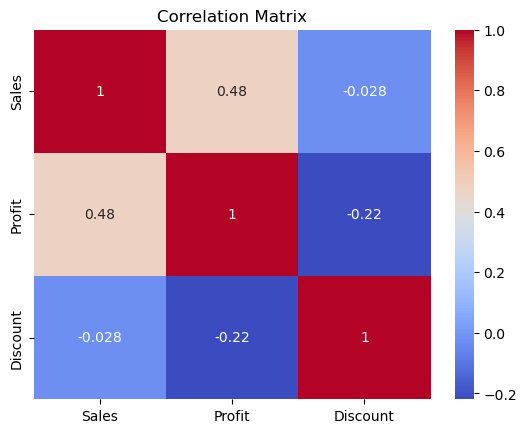

In [11]:
# Correlation Analysis
corr_matrix = df[['Sales', 'Profit', 'Discount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\rohit\AppData\Local\Temp\ipykernel_27880\533039241.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('M').sum()[['Sales', 'Profit']].plot(figsize=(10, 6))


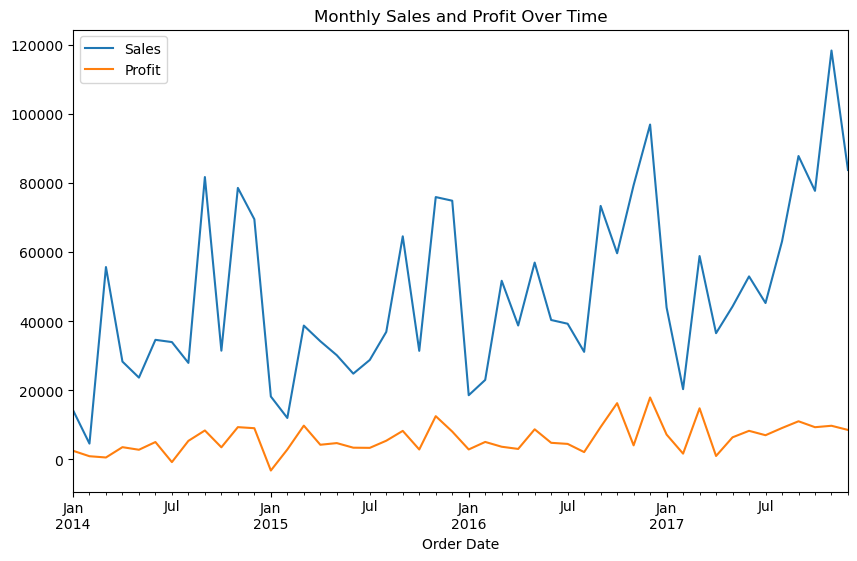

In [12]:
# Time Series Analysis: Sales and Profit over Time
df.set_index('Order Date', inplace=True)
df.resample('M').sum()[['Sales', 'Profit']].plot(figsize=(10, 6))
plt.title('Monthly Sales and Profit Over Time')
plt.show()

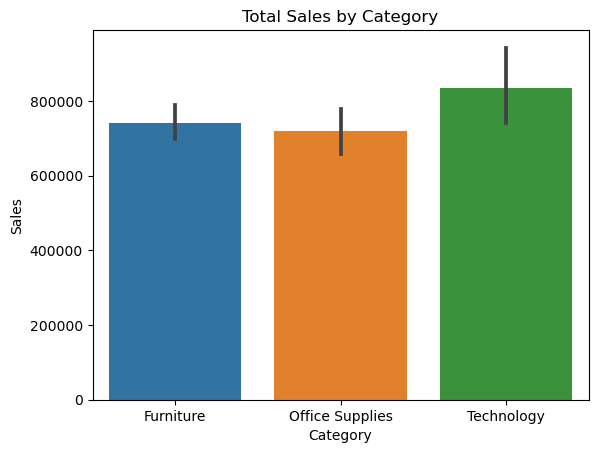

In [13]:
# Sales by Category
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.show()

# Step 4: Hypothesis Testing

In [ ]:
#  Hypothesis Testing: Profit Differences Across Regions
regions = df['Region'].unique()
profit_by_region = [df[df['Region'] == region]['Profit'] for region in regions]
f_stat, p_val = stats.f_oneway(*profit_by_region)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_val}")

In [15]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['Profit'], groups=df['Region'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Central   East  15.0431 0.0986  -1.7808  31.867  False
Central  South   11.765 0.4065   -7.714  31.244  False
Central   West  16.7563  0.043   0.3566 33.1561   True
   East  South  -3.2781 0.9697  -22.005 15.4487  False
   East   West   1.7132  0.992 -13.7857 17.2121  False
  South   West   4.9914 0.8975 -13.3553 23.3381  False
------------------------------------------------------


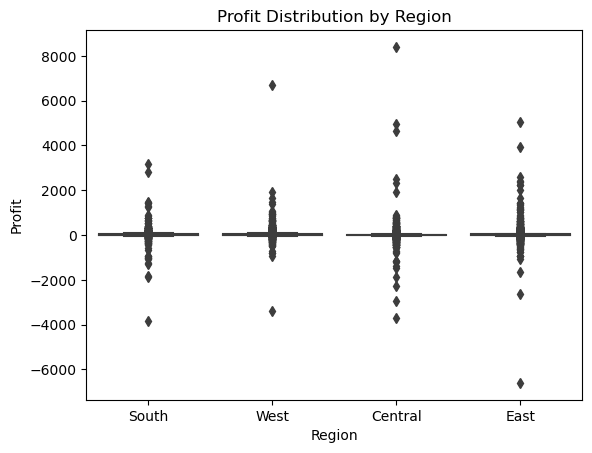

In [16]:
# Box plot of Profits by Region
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Profit Distribution by Region')
plt.show()